In [2]:
import numpy as np
from functions import *
from system_class import system
import matplotlib.pyplot as plt
import time 
#import qutip asqt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%load_ext autoreload
%autoreload 2
pi=np.pi

In [3]:
g= -0.25*1.0878* 2*pi
w = 7.5 * 2*pi
wq = 5.304 * 2*pi
Ad=0.025 * 2*np.pi
wd=7.5 * 2*np.pi
gamma=0.02 * 2*np.pi

tmax = 80
tint = tmax/800
nsteps = int( tmax / tint - 1 )
times = np.linspace( 0, tmax, nsteps )
nsteps = len( times )

spinx_arr = np.zeros(  nsteps )
spinz_arr = np.zeros(  nsteps )
pop01 = np.zeros(  nsteps )
n_arr = np.zeros(  nsteps) 

s = system(w01=wq,g=g,w=w,wd=wd,gamma=gamma,Ad=Ad,\
           cavity_dim=20, qubit_dim=2, dvice='TRSM0', atol=1e-8,rtol=1e-6, max_step=1e-4 )
s.set_initial_qb_state([1])
s.set_initial_cs_state( alpha=0 )
s.initialise_density_matrix()

print(s.paramchar(times[-1]))

Nq, Nc  = 2, 20
w01, wc, wd  =  5.3040,  7.5000,  7.5000 
Ad  =  0.0250 
ah  = 15915494.1500 
g  = -0.2720 
kappa  =  0.0200 
atol  = 1.0e-08 
rtol  = 1.0e-06 
max_step  = 1e-04 
couling_type  = 00 
device  = TRSM0 
tmax80_Nq2_Nc20_amp0.0250_kappa0.0200_wq5.3040_anh15915494.1500_wc7.5000_wd7.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0


t= 0.0 ||       0
t= 7.9 ||     200
t= 15.9 ||     193
t= 24.0 ||     192
t= 32.0 ||     190
t= 40.0 ||     190
t= 48.0 ||     205
t= 56.0 ||     207
t= 64.1 ||     210
t= 72.0 ||     191


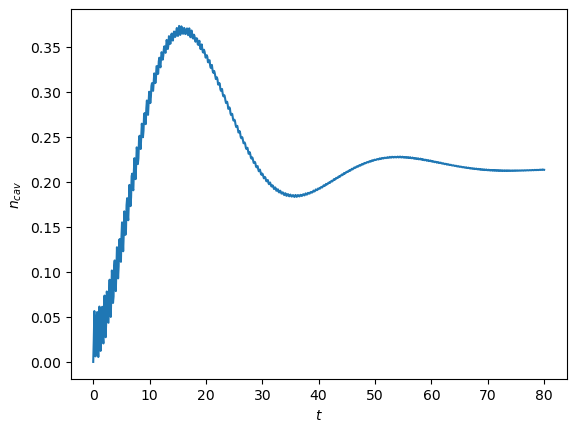

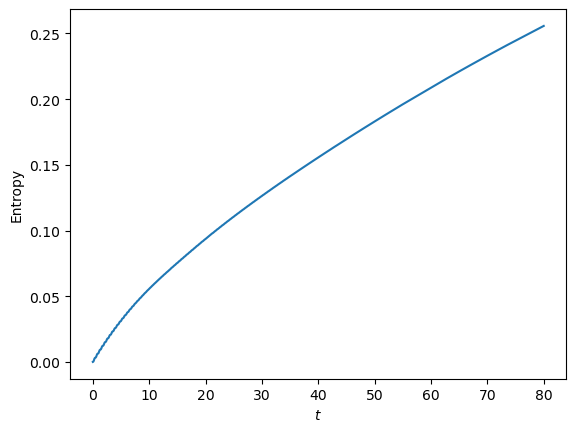

In [4]:
t1 = time.time()
rhos = s.time_evolve( times )
t2 = time.time()
s.save_and_plot( times, rhos, [0] )